<a href="https://colab.research.google.com/github/Zenitusu/ml-algo/blob/main/Prediction_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data cleaning
import pandas as pd

# Read the CSV file
data = pd.read_csv('survey.csv')

# Perform data cleaning operations
# For example, you can remove any rows with missing values
data = data.dropna()

# You can also remove any duplicate rows
data = data.drop_duplicates()

# Save the cleaned data to a new CSV file
data.to_csv('cleaned_survey.csv', index=False)



In [4]:
# dropping the unneccessary columns in dataset
import pandas as pd

# Read the CSV file
data = pd.read_csv('survey.csv')

# List of unnecessary columns to drop
columns_to_drop = ['Timestamp', 'comments']

# Drop the unnecessary columns
data = data.drop(columns_to_drop, axis=1)

# Print the updated dataset
print(data.head())




   Age  Gender         Country state self_employed family_history treatment  \
0   37  Female   United States    IL           NaN             No       Yes   
1   44       M   United States    IN           NaN             No        No   
2   32    Male          Canada   NaN           NaN             No        No   
3   31    Male  United Kingdom   NaN           NaN            Yes       Yes   
4   31    Male   United States    TX           NaN             No        No   

  work_interfere    no_employees remote_work  ...   anonymity  \
0          Often            6-25          No  ...         Yes   
1         Rarely  More than 1000          No  ...  Don't know   
2         Rarely            6-25          No  ...  Don't know   
3          Often          26-100          No  ...          No   
4          Never         100-500         Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No            

In [5]:
# data preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Read the CSV file
data = pd.read_csv('survey.csv')

# Drop unnecessary columns
columns_to_drop = ['Timestamp', 'comments']
data = data.drop(columns_to_drop, axis=1)

# Drop rows with missing values
data = data.dropna()

# Encode categorical variables using LabelEncoder
categorical_columns = ['Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                       'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
                       'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                       'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical',
                       'obs_consequence']
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Scale numerical variables using StandardScaler
numerical_columns = ['Age']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Perform any other preprocessing steps as needed

# Print the preprocessed dataset
print(data.head())


         Age  Gender  Country  state  self_employed  family_history  \
18  0.858072      25        3     16              1               1   
20 -0.315499      12        3     27              0               1   
21 -0.177431      25        3     22              1               0   
22  0.858072      12        3     15              0               0   
23  0.512904      12        3      8              0               0   

    treatment  work_interfere  no_employees  remote_work  ...  anonymity  \
18          0               3             0            1  ...          2   
20          1               3             1            0  ...          1   
21          0               0             0            1  ...          2   
22          1               1             2            1  ...          0   
23          1               0             5            0  ...          0   

    leave  mental_health_consequence  phys_health_consequence     coworkers  \
18      4                          1 

In [8]:
# ml logistic regression model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the CSV file
data = pd.read_csv('survey.csv')

# Select the necessary attributes for logistic regression
attributes = ['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere',
              'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
              'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
              'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical',
              'obs_consequence']

# Filter the data to include only the necessary attributes
data = data[attributes]

# Drop rows with missing values
data = data.dropna()

# Split the data into features (X) and target variable (y)
X = data.drop('treatment', axis=1)
y = data['treatment']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.7899159663865546
Precision: 0.7752808988764045
Recall: 0.9324324324324325
F1 Score: 0.8466257668711658


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Random Forest ML ALGO
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
data = pd.read_csv('survey.csv')

# Drop unnecessary columns
columns_to_drop = ['Timestamp', 'comments']
data = data.drop(columns_to_drop, axis=1)

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Convert 'Age' column to numeric
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Split the data into features (X) and target variable (y)
X = data.drop('mental_health_consequence', axis=1)
y = data['mental_health_consequence']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)






Accuracy: 0.6468253968253969


In [35]:
# Gradient Boosting Algorithm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
data = pd.read_csv('survey.csv')

# Select the necessary columns and set the target variable
columns = ['Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere',
           'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
           'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
           'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical',
           'obs_consequence']
target = 'treatment'

# Preprocess the data (e.g., handle missing values, encode categorical variables)
data = data[columns].dropna()  # Drop rows with missing values

# Label encode the categorical columns
label_encoder = LabelEncoder()
for column in columns:
    data[column] = label_encoder.fit_transform(data[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis=1), data[target], test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7899159663865546


male      821
Other     255
female    183
Name: Gender, dtype: int64


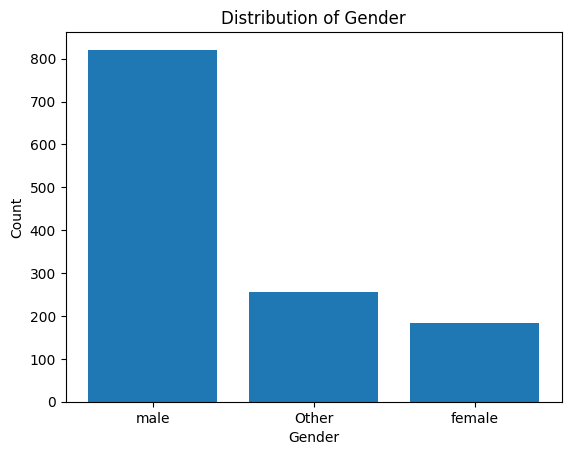

In [37]:
# Gender Distribution

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('survey.csv')

# Clean the gender column
data['Gender'] = data['Gender'].str.lower()

# Categorize any other gender as "Other"
data.loc[~data['Gender'].isin(['male', 'female']), 'Gender'] = 'Other'

# Print the updated dataset
print(data['Gender'].value_counts())


# Count the occurrences of each gender
gender_counts = data['Gender'].value_counts()

# Create a bar plot to visualize the distribution of gender
plt.bar(gender_counts.index, gender_counts.values)

# Set the labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Display the plot
plt.show()


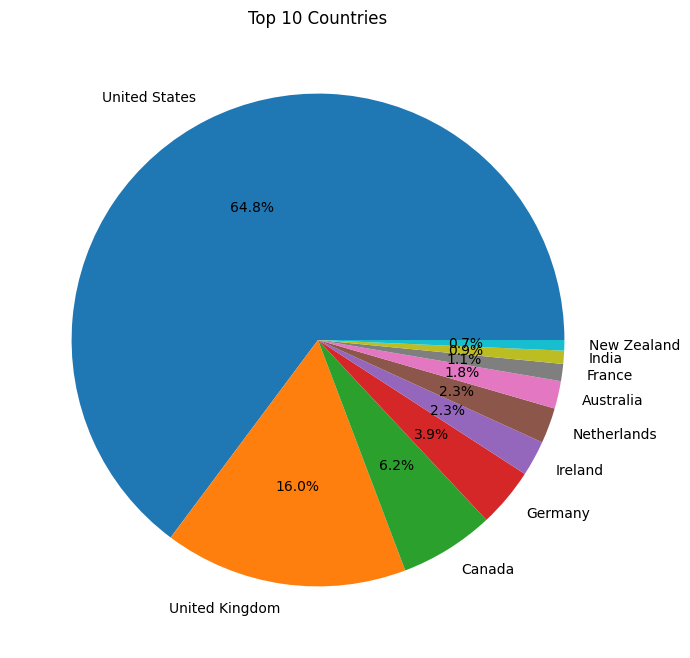

In [50]:
#2. Country Distribution

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('survey.csv')
country_counts = data['Country'].value_counts().head(10)

plt.figure(figsize=(8, 8))  # Adjust the figure size as per your preference
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Top 10 Countries')
plt.show()


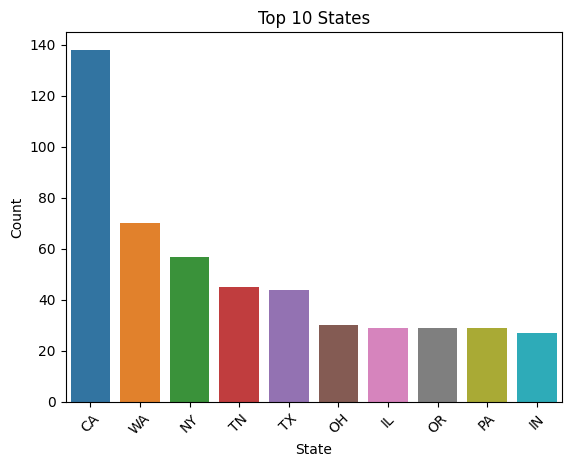

In [51]:
#3.State Distribution (Bar Chart with Seaborn):
import pandas as pd
import seaborn as sns

data = pd.read_csv('survey.csv')
state_counts = data['state'].value_counts().head(10)

sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States')
plt.xticks(rotation=45)
plt.show()

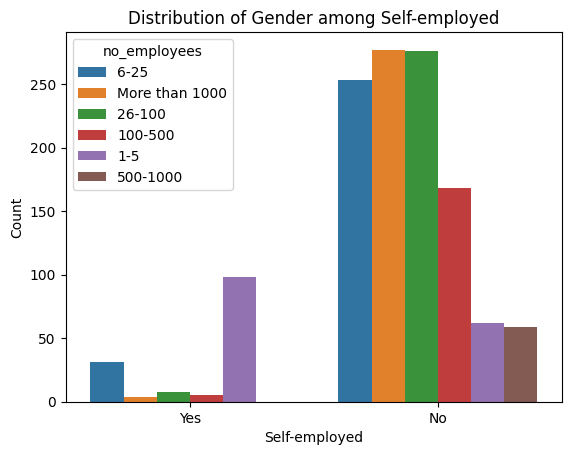

In [56]:
#4. Self-employed Impact (Box Plot with Seaborn):
import pandas as pd
import seaborn as sns
data = pd.read_csv('survey.csv')
sns.countplot(x='self_employed', hue='no_employees', data=data)
plt.xlabel('Self-employed')
plt.ylabel('Count')
plt.title('Distribution of Gender among Self-employed')
plt.show()


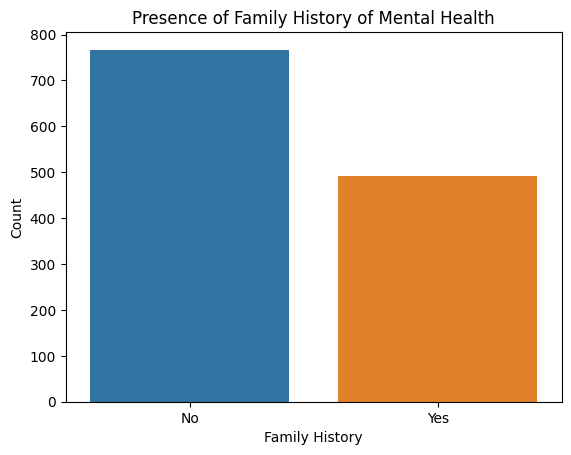

In [57]:
#5.Family History (Count Plot with Seaborn):

import pandas as pd
import seaborn as sns
data = pd.read_csv('survey.csv')
sns.countplot(x='family_history', data=data)
plt.xlabel('Family History')
plt.ylabel('Count')
plt.title('Presence of Family History of Mental Health')
plt.show()

In [58]:
#6.Treatment Proportion (Pie Chart with Plotly):

import pandas as pd
import plotly.express as px
data = pd.read_csv('survey.csv')
treatment_counts = data['treatment'].value_counts()
fig = px.pie(data_frame=data, names=treatment_counts.index, values=treatment_counts.values)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Proportion of Individuals Seeking Treatment')
fig.show()

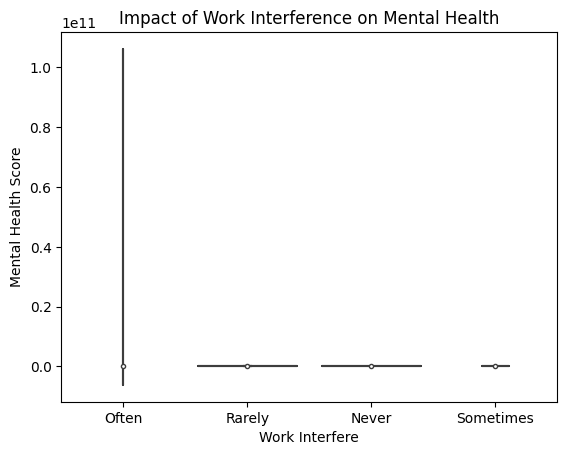

In [66]:
#7.Work Interfere Impact (Violin Plot with Seaborn):

import pandas as pd
import seaborn as sns
data = pd.read_csv('survey.csv')
sns.violinplot(x='work_interfere', y='Age', data=data)
plt.xlabel('Work Interfere')
plt.ylabel('Mental Health Score')
plt.title('Impact of Work Interference on Mental Health')
plt.show()


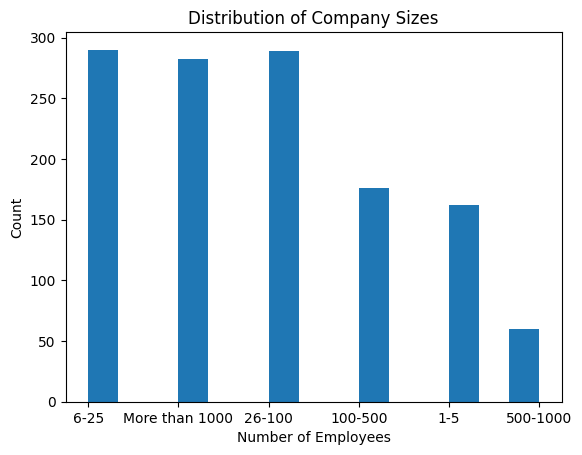

In [68]:
#8.No_employees Distribution (Histogram with Matplotlib):

import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('survey.csv')
plt.hist(data['no_employees'], bins=15)
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.title('Distribution of Company Sizes')
plt.show()

In [69]:
#9.Remote Work Impact (Bar Chart with Plotly):

import pandas as pd
import plotly.express as px
data = pd.read_csv('survey.csv')
remote_work_counts = data['remote_work'].value_counts()
fig = px.bar(data_frame=data, x=remote_work_counts.index, y=remote_work_counts.values)
fig.update_layout(title='Impact of Remote Work on Mental Health')
fig.show()

In [70]:
#10.Tech Company (Donut Chart with Plotly):

import pandas as pd
import plotly.graph_objects as go
data = pd.read_csv('survey.csv')
tech_company_counts = data['tech_company'].value_counts()
fig = go.Figure(data=[go.Pie(labels=tech_company_counts.index, values=tech_company_counts.values, hole=0.3)])
fig.update_layout(title='Distribution of Tech Companies')
fig.show()

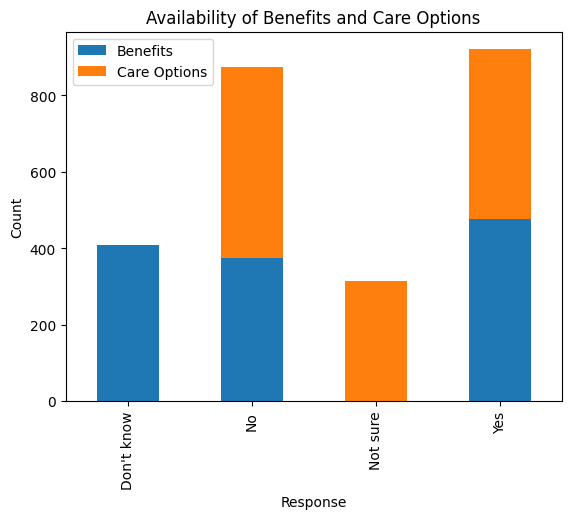

In [71]:
#11.Benefits Availability (Stacked Bar Chart with Seaborn):

import pandas as pd
import seaborn as sns
data = pd.read_csv('survey.csv')
benefits_counts = data['benefits'].value_counts()
care_options_counts = data['care_options'].value_counts()
df = pd.DataFrame({'Benefits': benefits_counts, 'Care Options': care_options_counts})
df.plot(kind='bar', stacked=True)
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Availability of Benefits and Care Options')
plt.show()

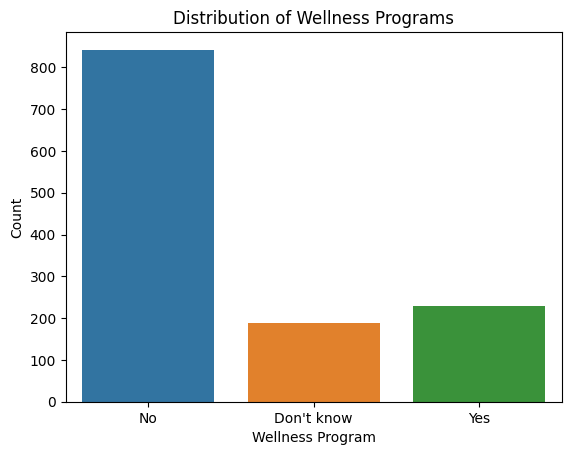

In [72]:
#12.Wellness Program (Count Plot with Seaborn):

import pandas as pd
import seaborn as sns
data = pd.read_csv('survey.csv')
sns.countplot(x='wellness_program', data=data)
plt.xlabel('Wellness Program')
plt.ylabel('Count')
plt.title('Distribution of Wellness Programs')
plt.show()
